<img style="float: right;" src="http://www2.le.ac.uk/liscb1.jpg">  
# Leicester Institute of Structural and Chemical Biology: Python for Biochemists
# K-means
The K-means algorithm is a simple clustering algorithm.  Although there are many more powerful ones now available, K-means is still one of the easiest to use (and understand,) and by-far the most commonly used.  

There are two three important points to remember with K-means:
1. You have to choose the number of clusters.
2. The starting point matters (i.e. you're not guaranteed to find the best global solution.)
3. The shape of the data matters.  

Here, *scikit-learn* is used to perform all the K-means clustering.

In [1]:
# Start with some imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_blobs, make_moons

from sklearn.cluster import k_means

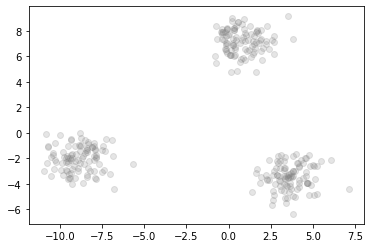

In [2]:
# Generate and plot our test dataset
X, ground_truth_y = make_blobs(n_samples=300, random_state=67)
plt.scatter(X[:, 0], X[:, 1], c='grey', alpha=0.2)

Now we're ready to do the clustering.  The function `k_means` from *scikit-learn* is a good option: it chooses sensible starting positions and runs multiple iterations, returning the one with the best (lowest) final score.  The default parameters usually work well.  All the options are available in the docstring.  

*Note that we're using a colormap (Set1) that's good for categorical data)*

In [3]:
centroids, assignments, inertia = k_means(X, n_clusters=3)
print('Centroid x and y values:\n', centroids)
print('Assigned classes:\n', assignments)
print('Final score (rarely used):', inertia)

Centroid x and y values:
 [[ 3.65170749 -3.45610446]
 [-8.89408436 -2.01497393]
 [ 0.81274768  7.18181417]]
Assigned classes:
 [0 2 0 0 0 0 1 1 0 0 1 1 2 2 1 0 0 1 2 0 2 0 1 0 0 1 2 2 2 1 0 2 1 0 0 2 0
 0 2 2 2 2 2 0 1 2 0 0 0 1 1 2 0 0 0 2 0 2 0 2 0 1 0 0 1 1 2 1 0 0 0 2 0 1
 0 0 0 2 1 1 2 0 0 1 2 1 2 2 2 0 2 2 1 2 2 1 1 0 1 2 2 2 0 0 1 2 2 2 0 1 2
 2 0 0 1 2 0 2 2 1 2 1 1 0 1 1 0 2 2 2 0 2 1 1 1 1 2 1 1 1 1 1 2 0 2 0 2 2
 0 2 1 2 0 2 0 0 2 0 1 0 0 2 1 0 2 2 2 1 2 0 1 0 2 1 1 1 0 1 2 1 0 2 2 2 2
 1 0 0 1 1 1 1 0 1 0 1 2 1 2 2 1 2 1 2 2 0 0 1 2 1 1 2 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 2 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 2 1 1 1 2 2 1 1 0 2 2 0 0 2 1 1 0
 0 0 1 2 1 0 1 1 0 0 1 1 2 2 2 2 0 0 2 1 0 0 2 1 2 0 2 2 2 2 0 2 0 2 2 0 2
 0 1 2 1]
Final score (rarely used): 583.622992199001


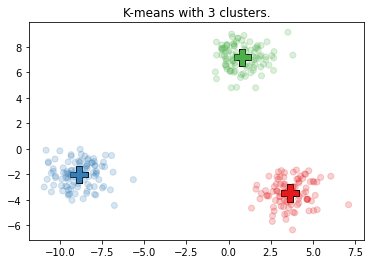

In [4]:
plt.scatter(centroids[:,0], centroids[:,1],
            color=[cm.Set1(l) for l in range(centroids.shape[0])],
            s=300, marker='P', edgecolors='black')
plt.scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
plt.title('K-means with 3 clusters.');

Simple as that.  But what happens if you get the number of clusters wrong?  

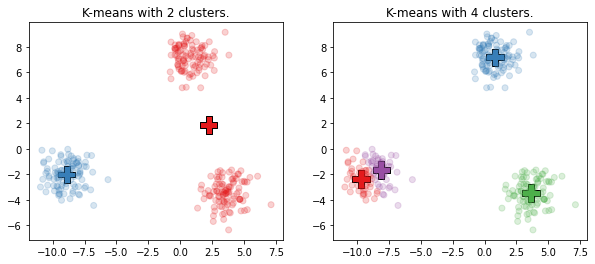

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

centroids, assignments, inertia = k_means(X, n_clusters=2)
axes[0].scatter(centroids[:,0], centroids[:,1], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(centroids.shape[0])])
axes[0].scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
axes[0].set_title('K-means with 2 clusters.')

centroids, assignments, inertia = k_means(X, n_clusters=4)
axes[1].scatter(centroids[:,0], centroids[:,1], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(centroids.shape[0])])
axes[1].scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
axes[1].set_title('K-means with 4 clusters.');

So what about data with odd shapes?

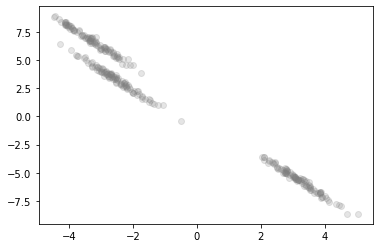

In [6]:
import numpy as np
X_skewed = X.dot(([0.4, -0.6], [-.5, 1]))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='grey', alpha=0.2)

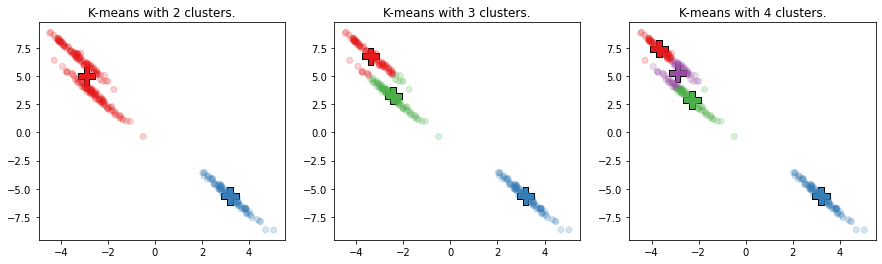

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

centroids, assignments, inertia = k_means(X_skewed, n_clusters=2)
axes[0].scatter(centroids[:,0], centroids[:,1], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(centroids.shape[0])])
axes[0].scatter(X_skewed[:, 0], X_skewed[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
axes[0].set_title('K-means with 2 clusters.')

centroids, assignments, inertia = k_means(X_skewed, n_clusters=3)
axes[1].scatter(centroids[:,0], centroids[:,1], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(centroids.shape[0])])
axes[1].scatter(X_skewed[:, 0], X_skewed[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
axes[1].set_title('K-means with 3 clusters.')

centroids, assignments, inertia = k_means(X_skewed, n_clusters=4)
axes[2].scatter(centroids[:,0], centroids[:,1], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(centroids.shape[0])])
axes[2].scatter(X_skewed[:, 0], X_skewed[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
axes[2].set_title('K-means with 4 clusters.');

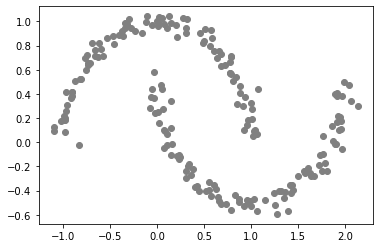

In [8]:
X, ground_truth_y = make_moons(n_samples=200, random_state=67, noise=0.05)
plt.scatter(X[:, 0], X[:, 1], c='grey')

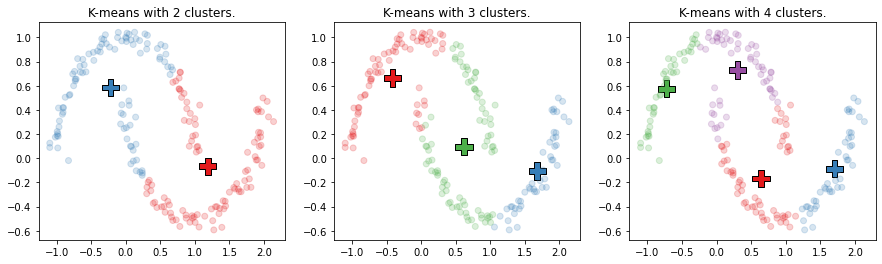

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

centroids, assignments, inertia = k_means(X, n_clusters=2)
axes[0].scatter(centroids[:,0], centroids[:,1], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(centroids.shape[0])])
axes[0].scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
axes[0].set_title('K-means with 2 clusters.')

centroids, assignments, inertia = k_means(X, n_clusters=3)
axes[1].scatter(centroids[:,0], centroids[:,1], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(centroids.shape[0])])
axes[1].scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
axes[1].set_title('K-means with 3 clusters.')

centroids, assignments, inertia = k_means(X, n_clusters=4)
axes[2].scatter(centroids[:,0], centroids[:,1], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(centroids.shape[0])])
axes[2].scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
axes[2].set_title('K-means with 4 clusters.');

... so k-means isn't a universal solution.  It's incredibly powerful, and super useful, but (as always,) you'll need to actually look at your data to make sure everything's ok.

## How and why
We do our best to show how algorithms work with pure python implementations (i.e. without external libraries.)  In order to demonstrate K-means, we'll use the `scikit-learn` package to generate our starting data.  

In [10]:
import random
from math import sqrt

import matplotlib.pyplot as plt
import matplotlib.cm as cm

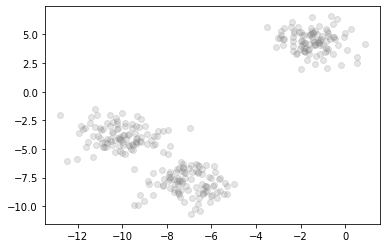

In [11]:
from sklearn.datasets import make_blobs
X, ground_truth_y = make_blobs(n_samples=300, random_state=1)  # 3
plt.scatter(X[:, 0], X[:, 1], c='grey', alpha=0.2);

Ok, now we have data with 3 clusters.  The next step is to randomly choose data points to act as the centers of those clusters.

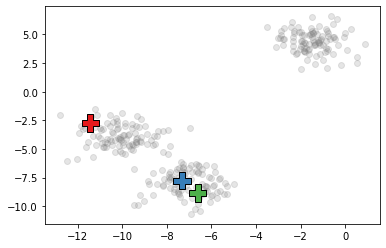

In [12]:
K = 3
centers = []
while len(centers) < K:
    new_center = tuple(random.choice(X))
    if new_center not in centers:
        centers.append(new_center)

plt.scatter(X[:, 0], X[:, 1], c='grey', alpha=0.2)
plt.scatter([c[0] for c in centers], [c[1] for c in centers], s=300, marker='P', edgecolors='black',
            color=[cm.Set1(l) for l in range(len(centers))])

The next step is to assign every data point to one of the clusters.  To do this, we iterate over every data point, and then calculate the distance from that point to each of our 'centers'.  The data point gets assigned to the cluster with the closest center point.

In [13]:
def assign_points_to_centers(X, centers):
    assignments = []
    for point in X:
        distance_squared = np.inf
        for i, center in enumerate(centers):
            point_to_center_distance_squared = (center[0] - point[0])**2 + (center[1] - point[1])**2
            if point_to_center_distance_squared < distance_squared:
                assignment = i
                distance_squared = point_to_center_distance_squared
        assignments.append(assignment)
    return assignments

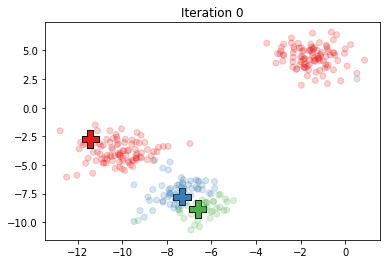

In [14]:
assignments = assign_points_to_centers(X, centers)

plt.scatter([c[0] for c in centers], [c[1] for c in centers], s=300, marker='P', edgecolors='black',
            color=[cm.Set1(l) for l in range(len(centers))])
plt.scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
plt.title('Iteration 0');

And now we take the *mean* of all the data points assigned to each cluster, and move the 'center' point to the mean position.

In [15]:
# Update Step
def update_centers(centers, X, assignments):
    assigned_points = [[] for _ in centers]
    for i, assignment in enumerate(assignments):
        assigned_points[assignment].append(X[i])
    
    new_centers = []
    for points in assigned_points:
        xs = [p[0] for p in points]
        ys = [p[1] for p in points]
        x = sum(xs) / len(xs)
        y = sum(ys) / len(ys)
        new_centers.append((x,y))
    return new_centers

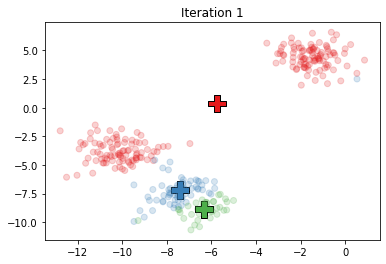

In [16]:
centers = update_centers(centers, X, assignments)

plt.scatter([c[0] for c in centers], [c[1] for c in centers], s=300, marker='P', edgecolors='black',
            color=[cm.Set1(l) for l in range(len(centers))])
plt.scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
plt.title('Iteration 1');

And that's it.  Now we just do that over and over.

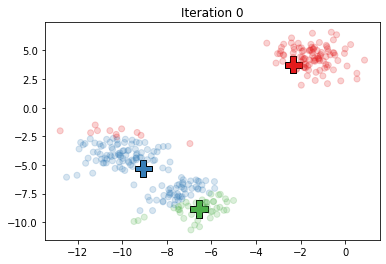

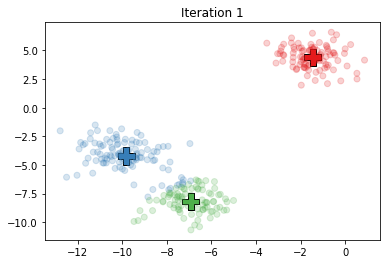

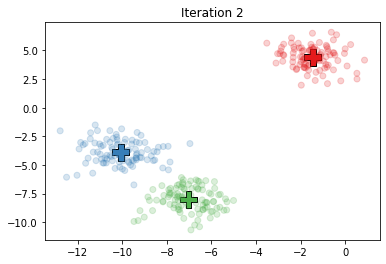

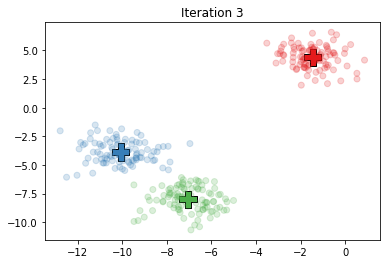

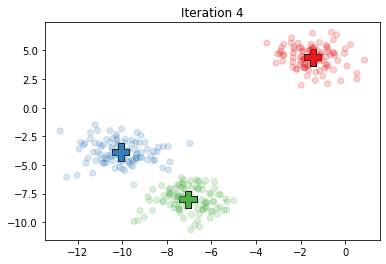

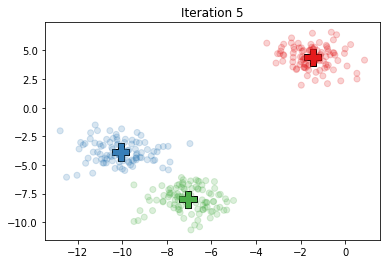

In [17]:
prior_changed_assignments = 1
for i in range(100):
    old_assignments = assignments
    assignments = assign_points_to_centers(X, centers)
    centers = update_centers(centers, X, assignments)
    
    changed_assignments = 0
    for old, new in zip(old_assignments, assignments):
        if old != new:
            changed_assignments += 1    
    
    plt.figure()
    plt.scatter([c[0] for c in centers], [c[1] for c in centers], s=300, marker='P', edgecolors='black',
                color=[cm.Set1(l) for l in range(len(centers))])
    plt.scatter(X[:, 0], X[:, 1], color=[cm.Set1(l) for l in assignments], alpha=0.2)
    plt.title(f'Iteration {i}')
    
    if prior_changed_assignments == 0:
        break
    else:
        prior_changed_assignments = changed_assignments

If you decide to run this simulation multiple times, you may discover that it doesn't always converge in a sensible way.  This is because the algorithm gets trapped in a 'local minimum'. Scikit-learn overcomes this with a combination of more sensible starting position choise and multiple runs (choosing the one with the best final score.)  

You may hear of variations on K-means.  These usually just tweak one bit of the calculation (e.g. K-medians gets the new center positions as the median rather than mean of each cluster,) but still use the same overall strategy.  More advanced cluster algorithms are available as well.